In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import sympy as sym
from sympy import init_printing
from scipy.interpolate import make_interp_spline


## Punto 1

## Punto 6

## Punto 7

In [2]:
data = pd.read_csv('Sigmoid.csv')


In [3]:
def fit_model(x, a, b, c):
    return a / (b + np.exp(-c * x))


def sym_fit(x, a, b, c):
    return a / (b + sym.exp(-c * x))


def cost_function(x, y, a, b, c):
    return np.sum((y - fit_model(x, a, b, c))**2)


def symbolic_cost_function(x, y, a, b, c):
    return sym.Sum((y - sym_fit(x, a, b, c))**2, (x, 0, len(data['x'])))


def partial_symbolic_derivative():
    x = sym.symbols('x')
    y = sym.symbols('y')
    a = sym.symbols('theta_0')
    b = sym.symbols('theta_1')
    c = sym.symbols('theta_2')
    sym_cost = symbolic_cost_function(x, y, a, b, c)
    return sym.diff(sym_cost, a), sym.diff(sym_cost, b), sym.diff(sym_cost, c)


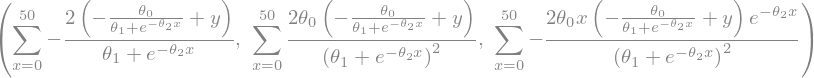

In [4]:
init_printing(use_latex=True)

partial_symbolic_derivative()


<img src="https://i.lensdump.com/i/1htIk1.jpg" alt="1htIk1.jpg" border="0" />

In [5]:
def partial_derivative(x, y, a, b, c):
    partial_a = 0
    partial_b = 0
    partial_c = 0
    for i in range(len(x)):
        partial_a += 2 * \
            (a / (b + np.exp(-c * x[i])) - y[i]) / (b + np.exp(-c * x[i]))
        partial_b += 2 * \
            (a / (b + np.exp(-c * x[i])) - y[i]) * a * \
            np.exp(-c * x[i]) / (b + np.exp(-c * x[i]))**2
        partial_c += 2 * (a / (b + np.exp(-c * x[i])) - y[i]) * \
            a * x[i] * np.exp(-c * x[i]) / (b + np.exp(-c * x[i]))**2
    return partial_a, partial_b, partial_c


def gradient_descent(x, y, a, b, c, learning_rate, iterations, e):
    for i in range(iterations):
        partial_a, partial_b, partial_c = partial_derivative(x, y, a, b, c)
        a = a - learning_rate * partial_a
        b = b - learning_rate * partial_b
        c = c - learning_rate * partial_c
        if (abs(partial_a) < e) and (abs(partial_b) < e) and (abs(partial_c) < e):
            break
    return a, b, c, i


In [6]:
model = gradient_descent(data['x'], data['y'], 1, 1, 1, 0.0005, 10000, 0.01)


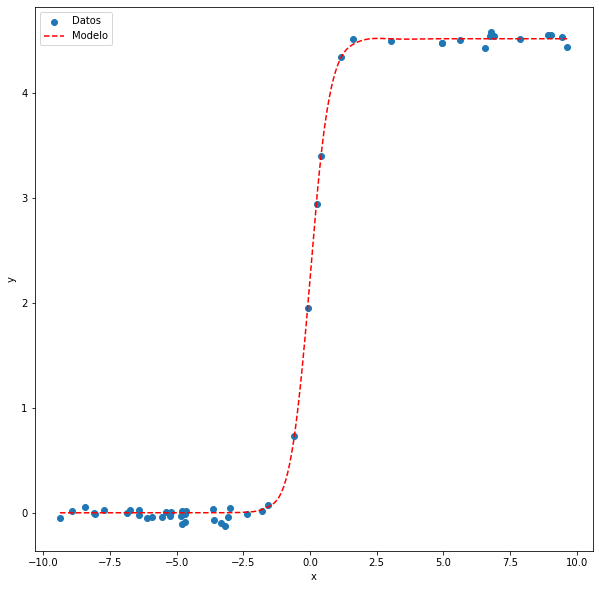

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
y_model = np.sort(fit_model(data['x'], model[0], model[1], model[2]))
x = np.sort(data['x'])
X_Y_Spline = make_interp_spline(x, y_model)

X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

ax.scatter(data['x'], data['y'], label='Datos')
ax.plot(X_, Y_, label='Modelo', color='red', linestyle='dashed')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


## Punto 8